In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import nltk
from nltk.corpus import wordnet as wn

from nltk.corpus import stopwords
from collections import Counter 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from matplotlib.cbook.deprecation import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

In [2]:
#reading data
data = pd.read_csv('./Shakespeare_data.csv')

In [3]:
#Replacing NaN value of Other
data['Player'].replace(np.nan, 'Other',inplace = True)
display(data)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111396 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


None

In [5]:
#Numbers of Plays
print("Number of plays are: " + str(data['Play'].nunique()))

print("Number of Unique players = ", len(data.Player.unique()))

Number of plays are: 36
Number of Unique players =  935


In [6]:
#Play's Name
pd.DataFrame(data['Play'].unique().tolist(), columns=['Play Name'])

,Play Name
0,Henry IV
1,Henry VI Part 1
2,Henry VI Part 2
3,Henry VI Part 3
4,Alls well that ends well
5,As you like it
6,Antony and Cleopatra
7,A Comedy of Errors
8,Coriolanus
9,Cymbeline


There are total 36 different plays in the CSV file and each plays have different number of players and each players have differnt number of lines.

Now adding year of the play in dataframe.

In [7]:
year_dict = {
    "Henry IV": 1597, "Henry VI Part 1": 1591, "Henry VI Part 2": 1591,"Henry VI Part 3": 1591,
    "Alls well that ends well": 1598,"As you like it": 1599,"Antony and Cleopatra": 1607,"A Comedy of Errors": 1594,
    "Coriolanus": 1605,"Cymbeline": 1611,'Hamlet': 1599,'Henry V': 1599,'Henry VIII': 1613,'King John': 1595,
    'Julius Caesar': 1599,'King Lear': 1605,'Loves Labours Lost': 1598,'macbeth': 1606,'Measure for measure': 1603,
    'Merchant of Venice': 1596,'Merry Wives of Windsor': 1602,'A Midsummer nights dream': 1595,
    'Much Ado about nothing': 1598,'Othello': 1603,'Pericles': 1607,'Richard II': 1595,'Richard III': 1593,
    'Romeo and Juliet': 1591,'Taming of the Shrew': 1590,'The Tempest': 1610,'Timon of Athens': 1605,
    'Titus Andronicus': 1588,'Troilus and Cressida': 1602,'Twelfth Night': 1601,'Two Gentlemen of Verona': 1589,
    'A Winters Tale': 1610
}


Adding years into dataframe according to the Play's name.

In [8]:
for index,row in data.iterrows():
    row = row.copy()
    year = year_dict[row["Play"]]
    data.loc[index, "Year"] = year

In [9]:
display(data)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Year
0,1,Henry IV,NaN,NaN,Other,ACT I,1597.0
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.,1597.0
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ...",1597.0
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",1597.0
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",1597.0
...,...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely",1610.0
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part,1610.0
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first,1610.0
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.,1610.0


### Number of Plays per year

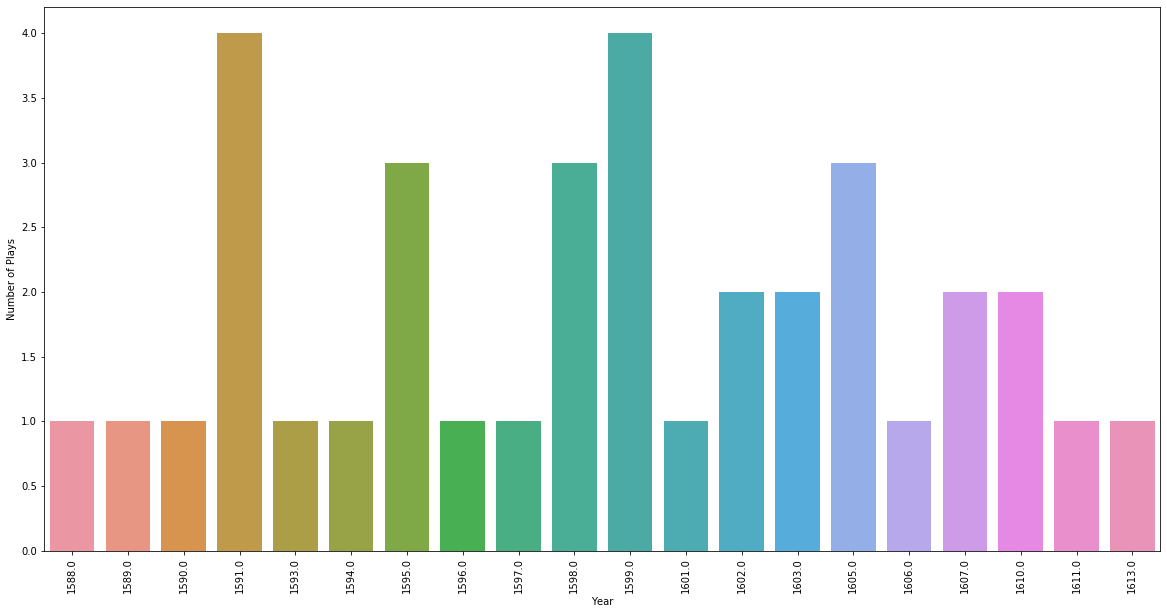

In [10]:
play_df = data.groupby(['Year'])['Play'].nunique()

#plotting graph
plt.figure(figsize=(20,10))
ax = sns.barplot(x=play_df.index, y=play_df)
ax.set(ylabel='Number of Plays', xlabel='Year')
plt.xticks(rotation=90)
plt.show()

### Number of words per year

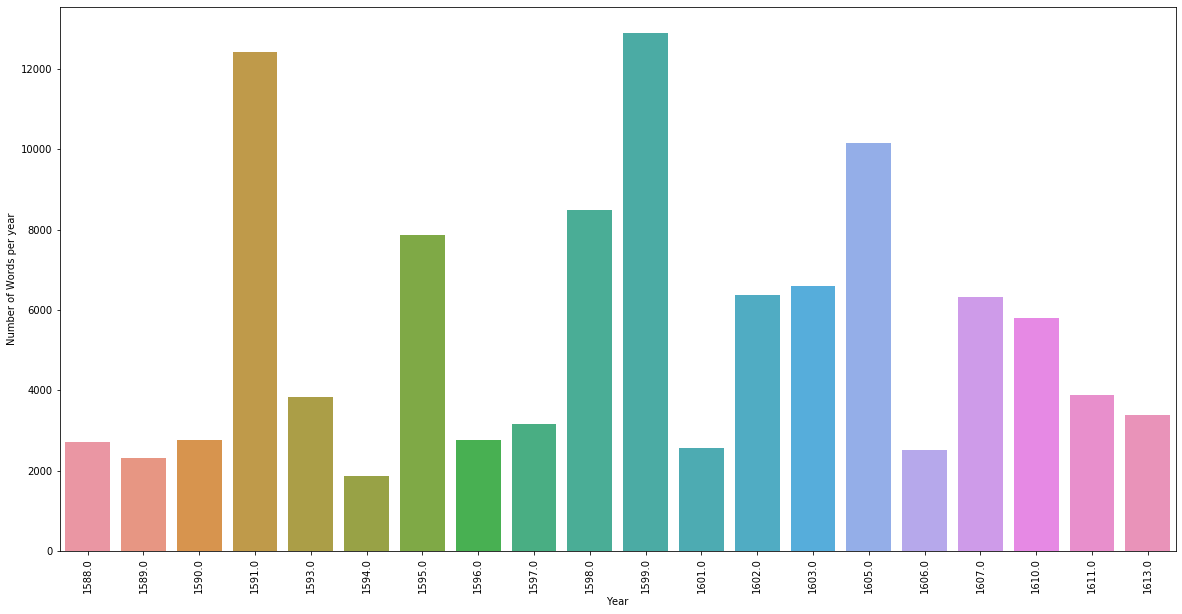

In [11]:
play_df = data.groupby(['Year'])['PlayerLine'].nunique()

#plotting graph
plt.figure(figsize=(20,10))
ax = sns.barplot(x=play_df.index, y=play_df)
ax.set(ylabel='Number of Words per year', xlabel='Year')
plt.xticks(rotation=90)
plt.show()

---
Now, I'll try to get mpst common Nouns, verbs and Adjective from the words list and also try to find most used places name .

In [12]:

words = []
for line in data.PlayerLine:
    line = line.replace(",", "")
    line = line.replace("'", "")
    line = line.replace("!", "")
    line = line.replace(":", "")
    line = line.replace(".", "")
    line = line.replace("?", "")
    words.extend(line.split())

#words = Counter(words)

nouns = []
verbs = []
adj = []
for w in words:
    try:
        tmp = wn.synsets(w)[0].pos()
        # if noun
        if tmp == 'n':            
            nouns.append(w)
        elif tmp == 'v':
            verbs.append(w)
        elif tmp == 'a':
            adj.append(w)
    except:
        continue
        
noun_list = nouns
nouns = Counter(nouns)
nouns = nouns.most_common(100)

verbs = Counter(verbs)
verbs = verbs.most_common(100)

adj = Counter(adj)
adj = adj.most_common(100)

### Nouns

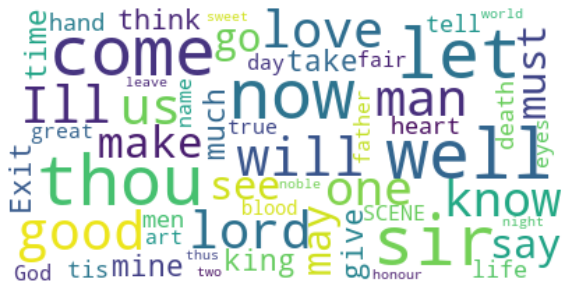

In [13]:
n_words = " ".join(line[0] for line in nouns)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(n_words)
# Display image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Verbs

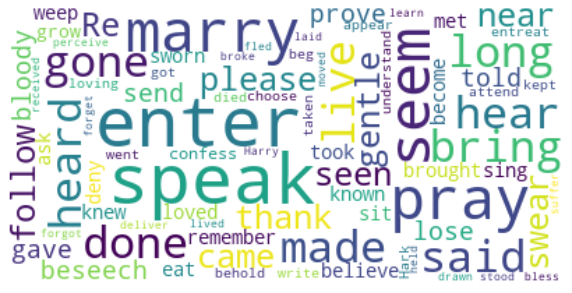

In [14]:
v_words = " ".join(line[0] for line in verbs)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(v_words)
# Display image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Adjective

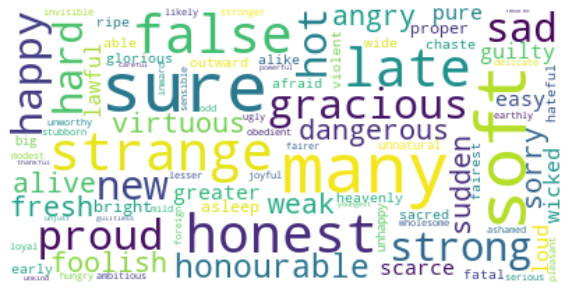

In [15]:
a_words = " ".join(line[0] for line in adj)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(a_words)
# Display image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As, we can see above that RichardIII has the maximum number of players i.e. 71.

Now, I'll find out the number of lines in each play.

### Place's Name

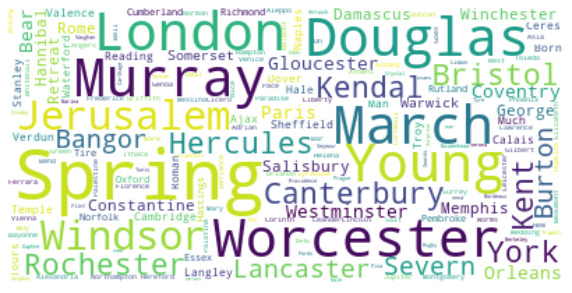

In [16]:
from geotext import GeoText

places = []

for place in noun_list:
    pl = GeoText(place)
    if pl.cities:
        try:
            places.append(pl.cities[0])
        except:
            continue

places = Counter(places)

a_words = " ".join(line for line in places.keys())

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=len(places), background_color="white").generate(a_words)
# Display image:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
#Total Number of Lines in each Play
play_data = data.groupby('Play').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']


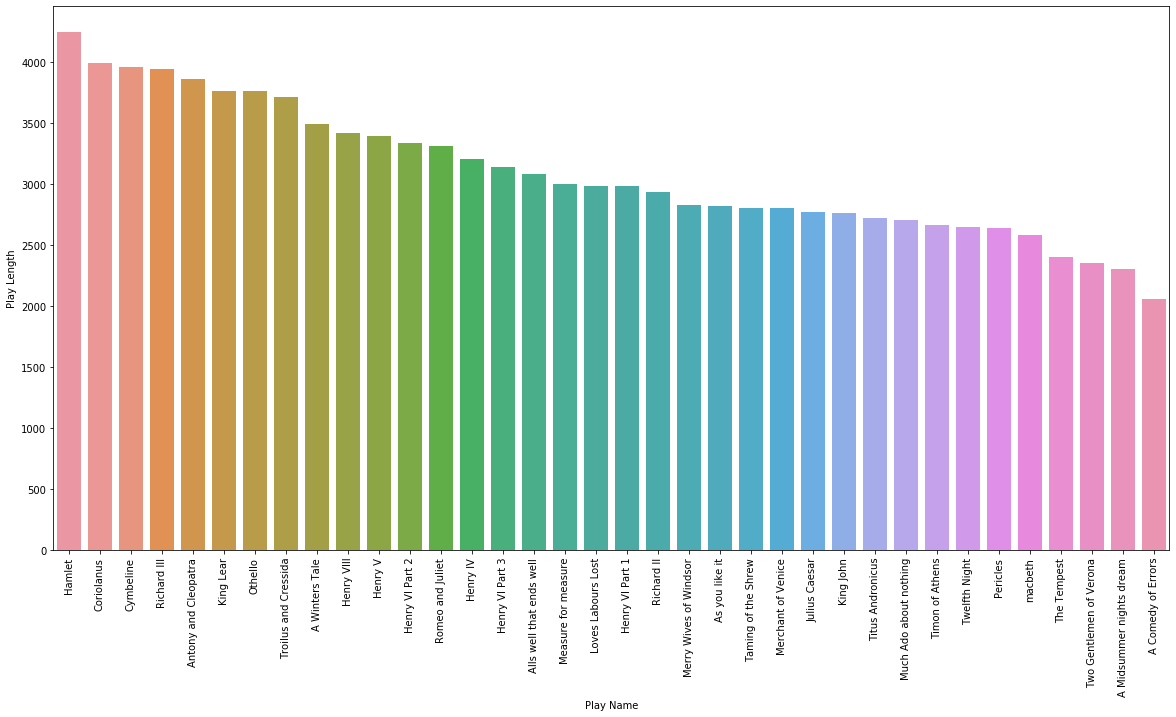

In [18]:
#Plotting graph for number of lines in each play
plt.figure(figsize=(20,10))
ax= sns.barplot(x='Play',y='Lines',data=play_data, order = play_data['Play'])
ax.set(ylabel='Play Length', xlabel='Play Name')
plt.xticks(rotation=90)
plt.show()


Now, I'll get unique Player name from the play. Then get the character's gender to find out the Gender ratio in Shakespeare's plays.

In [19]:
character_data = data.groupby(['Player', 'Play']).nunique().index

csv_data = []
for player, play in character_data:
    csv_data.append([player, play])

c_data = pd.DataFrame(csv_data, columns=['Player', 'Play'])

display(c_data)

,Player,Play
0,A Lord,As you like it
1,A Patrician,Coriolanus
2,A Player,Taming of the Shrew
3,AARON,Titus Andronicus
4,ABERGAVENNY,Henry VIII
...,...,...
1323,Young MARCIUS,Coriolanus
1324,of BUCKINGHAM,Richard III
1325,of King Henry VI,Richard III
1326,of Prince Edward,Richard III


In [20]:
c_data.to_csv("Character.csv", index=False)

'''
Now usnig the given link I'm getting players gender. 
Link: https://www.playshakespeare.com/
This is a tideous task but after that, saving the file with character gender.

'''

"\nNow usnig the given link I'm getting players gender. \nLink: https://www.playshakespeare.com/\nThis is a tideous task but after that, saving the file with character gender.\n\n"

---
#### Summary of what I did in this Project.

* After reading all data from CSV, I have dropped NaN value for Other
* Fetched total number of plays and unique play name

* After getting unique plays name, Ihave created one year dictionary which contains plays year.

* Then adding years into dataframe according to the Play.

* Plotting bar graph of Number of Plays per year and the one more bar graph Number of words per year.

* Then I've created one word list from the dataframe and divided into three different lists noun, verbs and adjective.

* Then plotted a word graphs which contains most common nouns, verbs and adjective used overall.

* Then I've found out most used place name all plays and plotted one word graph

* Finally, Fetched unique players in each play and converted into CSV file to get the gender ratio of Shakespeare's play
